In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [82]:
finace_df = pd.read_csv('재무재표샘플데이터.csv')
finace_df['주가상승률'] = (finace_df.미래_주가 - finace_df.현재_주가) /finace_df.현재_주가 *100

In [3]:
report_df = pd.read_csv('주가리포트_샘플.csv')

### 재무재표 샘플 데이터
- 2013~2020 데이터
- 2352개 기업
- 부채비율 :
![부채비율 설명](https://ecodemy.cafe24.com/debtr.gif)
자기자본 대비 타인자본의 비율을 말한다. 일반적으로 100% 이하를 표준비율로 본다.
- 매출액증가율 : (당기매출액 - 전기매출액) / 전기매출액 *100

- 영업이익증가율 :
- 당기순이익증가율 :
- 매출액_상태, 영업이익_상태, 당기순이익_상태
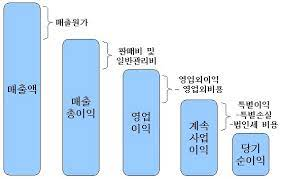
- EPS : 당기순이익을 그 기업이 발행한 총 주식수로 나눈 값 (한 주당 순이익)
- PER : 주가수익비율을 의미하는 것으로, 주가가 그 회사 1주당 수익의 몇 배가 되는가를 나타내는 지표입니다.  주가 / EPS = 주가 / 1주당 강기순이익(납세 후)로 계산
- ROA : 총자산순이익률로, 기업의 총자산으로 당기순이익이 얼마나 올랐는지 가늠하는 지표  (당기순이익 / 총자산) * 100
- ROE : 자기자본의 운영이 얼마나 효율적으로 이루어졌는지를 반영하는 지표입니다. (당기순이익 / 자기자본) * 100
- 현재_주가, 미래_주가 : 그 다음 년도의 주가 , 배당금

In [14]:
finace_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19408 entries, 0 to 19407
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기업        19408 non-null  object 
 1   연도        19408 non-null  int64  
 2   부채비율      15575 non-null  float64
 3   매출액증가율    13276 non-null  float64
 4   영업이익증가율   13486 non-null  float64
 5   당기순이익증가율  13383 non-null  float64
 6   매출액_상태    14914 non-null  object 
 7   영업이익_상태   15109 non-null  object 
 8   당기순이익_상태  15000 non-null  object 
 9   ROA       15467 non-null  float64
 10  ROE       13391 non-null  float64
 11  현재_주가     17936 non-null  float64
 12  미래_주가     15758 non-null  float64
 13  배당금       13800 non-null  float64
 14  PER       12994 non-null  float64
dtypes: float64(10), int64(1), object(4)
memory usage: 2.2+ MB


In [17]:
finace_df.describe()

,연도,부채비율,매출액증가율,영업이익증가율,당기순이익증가율,ROA,ROE,현재_주가,미래_주가,배당금,PER
count,19408.000000,15575.000000,13276.000000,13486.000000,13383.000000,15467.000000,13391.000000,1.793600e+04,1.575800e+04,13800.000000,12994.000000
mean,2016.545754,57.192991,-13.714507,5.663680,15.950976,-0.251890,-1.786861,2.188167e+04,2.170006e+04,291.860870,59.039385
std,2.270829,25.675239,974.627140,3912.655608,3151.378894,19.553647,103.299383,6.410857e+04,6.273922e+04,1409.908478,437.410113
min,2013.000000,-690.981106,-109930.000100,-376694.348500,-206191.046200,-685.047986,-6234.108558,9.600000e+01,1.080000e+02,0.000000,0.007537
25%,2015.000000,41.922336,-7.787340,-23.025541,-24.660531,-1.692919,-3.624691,2.990000e+03,3.000000e+03,0.000000,7.397497
50%,2017.000000,57.965976,2.900938,15.989388,25.121183,2.263272,4.106012,6.777000e+03,6.770000e+03,20.000000,14.770284
75%,2018.000000,75.189708,13.522463,68.099875,89.798188,5.947898,10.153421,1.700000e+04,1.696200e+04,170.000000,32.129018
max,2020.000000,100.000000,100.000000,111606.989200,104804.574900,407.621432,5452.195323,1.614000e+06,1.614000e+06,100000.000000,29780.000000


In [5]:
finace_df.columns

Index(['기업', '연도', '부채비율', '매출액증가율', '영업이익증가율', '당기순이익증가율', '매출액_상태',
       '영업이익_상태', '당기순이익_상태', 'ROA', 'ROE', '현재_주가', '미래_주가', '배당금', 'PER'],
      dtype='object')

In [7]:
finace_df.연도.value_counts()

2018    2944
2013    2352
2014    2352
2015    2352
2016    2352
2017    2352
2019    2352
2020    2352
Name: 연도, dtype: int64

In [8]:
finace_df.기업.value_counts()

아프리카TV     9
바이오톡스텍     9
천일고속       9
천랩         9
미코바이오메드    9
          ..
삼진         8
삼지전자       8
삼정펄프       8
삼일제약       8
힘스         8
Name: 기업, Length: 2352, dtype: int64

In [94]:
finace_df['주가상승률'] = (finace_df.미래_주가 - finace_df.현재_주가) /finace_df.현재_주가 *100

In [34]:
# 속성 간 상관관계

finace_df.corr()

# 배당금 - 미래주가
# 배당금 - 현재주가
# roa - 부채비율
#

,연도,부채비율,매출액증가율,영업이익증가율,당기순이익증가율,ROA,ROE,현재_주가,미래_주가,배당금,PER,주가상승률
연도,1.000000,0.025475,-0.005835,0.002336,0.002895,-0.061275,-0.037333,-0.005755,-0.014127,0.004317,-0.001662,0.086918
부채비율,0.025475,1.000000,0.005498,0.003270,-0.001461,0.372973,0.040043,0.035572,0.042042,0.042313,-0.000145,-0.005553
매출액증가율,-0.005835,0.005498,1.000000,0.262334,0.314718,0.011902,0.003108,0.004234,0.005072,0.003421,-0.003035,0.010434
영업이익증가율,0.002336,0.003270,0.262334,1.000000,0.084931,0.013646,-0.001421,-0.000926,-0.001158,0.001656,-0.003518,-0.000865
당기순이익증가율,0.002895,-0.001461,0.314718,0.084931,1.000000,0.001693,0.000350,0.002752,0.004847,-0.005467,0.070111,0.008640
ROA,-0.061275,0.372973,0.011902,0.013646,0.001693,1.000000,0.194443,0.059915,0.061828,0.092958,0.001646,-0.001933
ROE,-0.037333,0.040043,0.003108,-0.001421,0.000350,0.194443,1.000000,0.027650,0.027613,0.030283,0.003153,0.008223
현재_주가,-0.005755,0.035572,0.004234,-0.000926,0.002752,0.059915,0.027650,1.000000,0.921305,0.355394,0.036747,-0.060731
미래_주가,-0.014127,0.042042,0.005072,-0.001158,0.004847,0.061828,0.027613,0.921305,1.000000,0.326924,0.017722,0.056265
배당금,0.004317,0.042313,0.003421,0.001656,-0.005467,0.092958,0.030283,0.355394,0.326924,1.000000,-0.017966,-0.025859


In [35]:
plt.figure(figsize=(5,5)) # x축, y축 사이즈
%matplotlib inline

/Users/parkdahye/miniforge3/envs/newenv/lib/python3.10/site-packages/seaborn/utils.py:95: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.draw()
/Users/parkdahye/miniforge3/envs/newenv/lib/python3.10/site-packages/seaborn/utils.py:95: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.draw()
/Users/parkdahye/miniforge3/envs/newenv/lib/python3.10/site-packages/seaborn/utils.py:95: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.draw()
/Users/parkdahye/miniforge3/envs/newenv/lib/python3.10/site-packages/seaborn/utils.py:95: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from current font.
  fig.canvas.draw()
/Users/parkdahye/miniforge3/envs/newenv/lib/python3.10/site-packages/seaborn/utils.py:95: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.draw()
/Users/parkdahye/miniforge3/envs/newenv/lib/python3.10/site-pa

<AxesSubplot:>

/Users/parkdahye/miniforge3/envs/newenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/parkdahye/miniforge3/envs/newenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/parkdahye/miniforge3/envs/newenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/parkdahye/miniforge3/envs/newenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/parkdahye/miniforge3/envs/newenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Gly

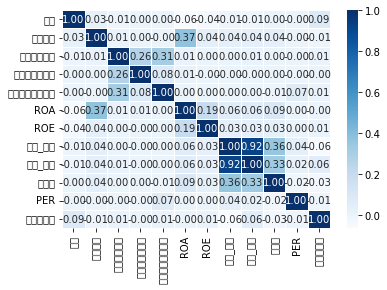

In [33]:
sns.heatmap(data = finace_df.corr(), annot=True, fmt = '.2f', linewidths=0.5, cmap='Blues')

In [26]:
finace_df[finace_df.당기순이익_상태 == '흑자지속' ]

,기업,연도,부채비율,매출액증가율,영업이익증가율,당기순이익증가율,매출액_상태,영업이익_상태,당기순이익_상태,ROA,ROE,현재_주가,미래_주가,배당금,PER
9,AJ네트웍스,2014,19.700517,25.121481,8.366221,35.378967,흑자지속,흑자지속,흑자지속,1.951326,11.277778,7100.0,8300.0,0.0,2.598829
10,AJ네트웍스,2015,23.070472,4.209130,-3.661193,3.216892,흑자지속,흑자지속,흑자지속,1.680447,8.510652,8300.0,5800.0,0.0,3.471351
11,AJ네트웍스,2016,20.539194,15.814609,-20.044810,-69.744998,흑자지속,흑자지속,흑자지속,0.820595,4.137914,5800.0,7170.0,60.0,20.138889
12,AJ네트웍스,2017,18.994413,-48.574042,-175.685556,17.280774,흑자지속,흑자지속,흑자지속,0.877023,4.721198,7170.0,4810.0,86.0,22.406250
13,AJ네트웍스,2018,19.098304,20.133671,205.435144,44.599353,흑자지속,적자전환,흑자지속,1.447255,7.938147,4810.0,2950.0,100.0,200.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19397,희림,2018,38.442179,5.886840,-27.705934,6.427056,흑자지속,흑자지속,흑자지속,2.941597,7.661244,4725.0,3540.0,0.0,15.340909
19398,희림,2019,33.914851,5.091191,6.006084,-10.800327,흑자지속,흑자지속,흑자지속,2.209572,6.704890,3540.0,4875.0,0.0,11.683168
19399,희림,2020,35.014611,12.413798,20.890562,24.606422,흑자지속,흑자지속,흑자지속,2.822088,8.340441,4875.0,NaN,0.0,12.532134
19404,힘스,2017,72.028464,NaN,57.915341,59.139944,NaN,흑자지속,흑자지속,16.722845,32.533952,8115.0,7438.0,200.0,3.093786


In [30]:
finace_df


,기업,연도,부채비율,매출액증가율,영업이익증가율,당기순이익증가율,매출액_상태,영업이익_상태,당기순이익_상태,ROA,ROE,현재_주가,미래_주가,배당금,PER,주가상승률
0,3S,2013,70.612320,NaN,NaN,NaN,적자전환,적자전환,적자전환,1.036271,NaN,6100.0,4350.0,NaN,NaN,-28.688525
1,3S,2014,60.288336,-11.687845,173.179128,114.728018,흑자지속,적자전환,적자전환,-6.675781,-10.489496,4350.0,2535.0,NaN,NaN,-41.724138
2,3S,2015,56.323967,-24.352916,38.894997,14.974005,흑자지속,적자지속,적자지속,-8.312107,-13.836280,2535.0,3595.0,NaN,NaN,41.814596
3,3S,2016,59.923676,2.240210,453.409466,-64.511098,흑자지속,흑자전환,적자지속,-5.893767,-9.383155,3595.0,2320.0,0.0,43.313253,-35.465925
4,3S,2017,54.331315,10.359573,148.592592,61.341308,흑자지속,적자전환,적자지속,-16.392325,-27.605322,2320.0,2685.0,0.0,11.047619,15.732759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19403,힘스,2016,45.998444,NaN,NaN,NaN,NaN,NaN,NaN,10.213367,NaN,16530.0,8115.0,0.0,10.726801,-50.907441
19404,힘스,2017,72.028464,NaN,57.915341,59.139944,NaN,흑자지속,흑자지속,16.722845,32.533952,8115.0,7438.0,200.0,3.093786,-8.342575
19405,힘스,2018,80.625862,NaN,1014.435660,1285.956550,NaN,적자전환,적자전환,-1.567183,-1.950691,7438.0,7488.0,0.0,38.739583,0.672224
19406,힘스,2019,70.065289,NaN,122.184183,112.102500,NaN,흑자전환,흑자전환,9.732740,14.897331,7488.0,13400.0,200.0,9.957447,78.952991


In [2]:
# groupby 메서드


In [112]:
상승률 = finace_df.groupby('기업')['주가상승률'].mean()
# .to_frame() #데이터프레임으로 보기
상승률

기업
3S        -8.306135
AJ네트웍스    -5.405252
AK홀딩스      2.674196
APS홀딩스    21.362347
AP시스템     -3.742039
            ...    
흥국에프엔비    31.044655
흥국화재       7.895654
흥아해운      -9.107767
희림        -1.243244
힘스         2.910743
Name: 주가상승률, Length: 2352, dtype: float64

In [56]:
상승률.to_csv('평균주가상승률.csv', encoding='utf-8-sig')



In [77]:
incre  = 상승률[상승률 > 60].index
incre

Index(['CBI', 'HMM', 'YG PLUS', '갤럭시아머니트리', '국일제지', '나이벡', '네이처셀', '넵튠', '노바텍',
       '대주전자재료', '대한방직', '덕성', '데브시스터즈', '동성제약', '동신건설', '동원시스템즈', '동화기업',
       '두산퓨얼셀', '랩지노믹스', '룽투코리아', '리더스코스메틱', '링크제니시스', '미래컴퍼니', '비덴트', '삼강엠앤티',
       '삼화콘덴서', '새로닉스', '서연', '서연탑메탈', '서울옥션', '셀트리온제약', '솔루스첨단소재', '수산아이앤티',
       '시디즈', '신라젠', '신세계건설', '신풍제약', '싸이토젠', '썸에이지', '씨아이에스', '씨에스윈드', '씨이랩',
       '아래스', '아이크래프트', '아주IB투자', '알테오젠', '에브리봇', '에스앤에스텍', '에이스토리', '에이치엘비',
       '에이텍', '에이텍티앤', '에코프로', '에프앤리퍼블릭', '에프에스티', '엔지켐생명과학', '엘앤에프',
       '엘앤케이바이오', '엠로', '엠투엔', '오스코텍', '오킨스전자', '우리기술투자', '월덱스', '웹젠', '유니셈',
       '유니슨', '유니테스트', '이엔드디', '이엔플러스', '이원컴포텍', '이즈미디어', '이지바이오', '중앙디앤엠',
       '지어소프트', '칩스앤미디어', '컴투스', '케이씨티', '케이피엠테크', '코스모신소재', '코이즈', '키네마스터',
       '토탈소프트', '티씨케이', '티에스이', '파크시스템스', '팬엔터테인먼트', '포스코케미칼', '폴루스바이오팜',
       '한국화장품', '한국화장품제조', '한네트', '한미사이언스', '한주케미칼앤홀딩스', '한창', '현대바이오', '화승인더',
       '효성첨단소재'],
      dtype='object', name='기업')

In [78]:
incre.list = list(incre)
type(incre.list)
incre.list

['CBI',
 'HMM',
 'YG PLUS',
 '갤럭시아머니트리',
 '국일제지',
 '나이벡',
 '네이처셀',
 '넵튠',
 '노바텍',
 '대주전자재료',
 '대한방직',
 '덕성',
 '데브시스터즈',
 '동성제약',
 '동신건설',
 '동원시스템즈',
 '동화기업',
 '두산퓨얼셀',
 '랩지노믹스',
 '룽투코리아',
 '리더스코스메틱',
 '링크제니시스',
 '미래컴퍼니',
 '비덴트',
 '삼강엠앤티',
 '삼화콘덴서',
 '새로닉스',
 '서연',
 '서연탑메탈',
 '서울옥션',
 '셀트리온제약',
 '솔루스첨단소재',
 '수산아이앤티',
 '시디즈',
 '신라젠',
 '신세계건설',
 '신풍제약',
 '싸이토젠',
 '썸에이지',
 '씨아이에스',
 '씨에스윈드',
 '씨이랩',
 '아래스',
 '아이크래프트',
 '아주IB투자',
 '알테오젠',
 '에브리봇',
 '에스앤에스텍',
 '에이스토리',
 '에이치엘비',
 '에이텍',
 '에이텍티앤',
 '에코프로',
 '에프앤리퍼블릭',
 '에프에스티',
 '엔지켐생명과학',
 '엘앤에프',
 '엘앤케이바이오',
 '엠로',
 '엠투엔',
 '오스코텍',
 '오킨스전자',
 '우리기술투자',
 '월덱스',
 '웹젠',
 '유니셈',
 '유니슨',
 '유니테스트',
 '이엔드디',
 '이엔플러스',
 '이원컴포텍',
 '이즈미디어',
 '이지바이오',
 '중앙디앤엠',
 '지어소프트',
 '칩스앤미디어',
 '컴투스',
 '케이씨티',
 '케이피엠테크',
 '코스모신소재',
 '코이즈',
 '키네마스터',
 '토탈소프트',
 '티씨케이',
 '티에스이',
 '파크시스템스',
 '팬엔터테인먼트',
 '포스코케미칼',
 '폴루스바이오팜',
 '한국화장품',
 '한국화장품제조',
 '한네트',
 '한미사이언스',
 '한주케미칼앤홀딩스',
 '한창',
 '현대바이오',
 '화승인더',
 '효성첨단소재']

In [81]:
finace_df = finace_df.reset_index()

In [86]:
finace_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19408 entries, 0 to 19407
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기업        19408 non-null  object 
 1   연도        19408 non-null  int64  
 2   부채비율      15575 non-null  float64
 3   매출액증가율    13276 non-null  float64
 4   영업이익증가율   13486 non-null  float64
 5   당기순이익증가율  13383 non-null  float64
 6   매출액_상태    14914 non-null  object 
 7   영업이익_상태   15109 non-null  object 
 8   당기순이익_상태  15000 non-null  object 
 9   ROA       15467 non-null  float64
 10  ROE       13391 non-null  float64
 11  현재_주가     17936 non-null  float64
 12  미래_주가     15758 non-null  float64
 13  배당금       13800 non-null  float64
 14  PER       12994 non-null  float64
dtypes: float64(10), int64(1), object(4)
memory usage: 2.2+ MB


In [95]:
finace_df2 = finace_df.set_index('기업')
finace_df2

,연도,부채비율,매출액증가율,영업이익증가율,당기순이익증가율,매출액_상태,영업이익_상태,당기순이익_상태,ROA,ROE,현재_주가,미래_주가,배당금,PER,주가상승률
기업,,,,,,,,,,,,,,,
3S,2013,70.612320,NaN,NaN,NaN,적자전환,적자전환,적자전환,1.036271,NaN,6100.0,4350.0,NaN,NaN,-28.688525
3S,2014,60.288336,-11.687845,173.179128,114.728018,흑자지속,적자전환,적자전환,-6.675781,-10.489496,4350.0,2535.0,NaN,NaN,-41.724138
3S,2015,56.323967,-24.352916,38.894997,14.974005,흑자지속,적자지속,적자지속,-8.312107,-13.836280,2535.0,3595.0,NaN,NaN,41.814596
3S,2016,59.923676,2.240210,453.409466,-64.511098,흑자지속,흑자전환,적자지속,-5.893767,-9.383155,3595.0,2320.0,0.0,43.313253,-35.465925
3S,2017,54.331315,10.359573,148.592592,61.341308,흑자지속,적자전환,적자지속,-16.392325,-27.605322,2320.0,2685.0,0.0,11.047619,15.732759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
힘스,2016,45.998444,NaN,NaN,NaN,NaN,NaN,NaN,10.213367,NaN,16530.0,8115.0,0.0,10.726801,-50.907441
힘스,2017,72.028464,NaN,57.915341,59.139944,NaN,흑자지속,흑자지속,16.722845,32.533952,8115.0,7438.0,200.0,3.093786,-8.342575
힘스,2018,80.625862,NaN,1014.435660,1285.956550,NaN,적자전환,적자전환,-1.567183,-1.950691,7438.0,7488.0,0.0,38.739583,0.672224


In [84]:

for i in incre.list:
    data = finace_df.loc[i]
    print(data)


KeyError: 'CBI'

In [96]:
incre_df = finace_df2.loc[incre.list]

In [97]:
incre_df = incre_df.reset_index()
incre_df

,기업,연도,부채비율,매출액증가율,영업이익증가율,당기순이익증가율,매출액_상태,영업이익_상태,당기순이익_상태,ROA,ROE,현재_주가,미래_주가,배당금,PER,주가상승률
0,CBI,2013,45.517114,NaN,NaN,NaN,흑자지속,흑자지속,흑자지속,2.442503,NaN,441.0,494.0,50.0,1.436482,12.018141
1,CBI,2014,46.574208,-0.858953,9.374222,-56.292894,흑자지속,흑자지속,흑자지속,1.584943,3.418144,494.0,721.0,50.0,3.166667,45.951417
2,CBI,2015,51.489380,-16.391019,-53.865398,-62.211931,흑자지속,흑자지속,흑자지속,0.970557,1.985742,721.0,620.0,50.0,7.210000,-14.008322
3,CBI,2016,55.350398,-0.785005,-435.352724,-35.665295,흑자지속,흑자지속,흑자지속,0.694476,1.318624,620.0,482.0,0.0,NaN,-22.258065
4,CBI,2017,59.840029,5.835095,146.749077,145.380697,흑자지속,적자전환,적자전환,-1.645763,-2.757521,482.0,511.0,0.0,NaN,6.016598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,효성첨단소재,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160000.0,160000.0,0.0,NaN,0.000000
797,효성첨단소재,2017,NaN,NaN,NaN,NaN,적자지속,적자지속,적자지속,NaN,NaN,160000.0,129500.0,0.0,NaN,-19.062500
798,효성첨단소재,2018,18.385461,100.000000,100.000000,100.000000,흑자전환,흑자전환,적자지속,-0.936787,-10.190523,129500.0,61100.0,0.0,21.878696,-52.818533
799,효성첨단소재,2019,16.016780,42.118229,59.487018,55.119811,흑자지속,흑자지속,적자지속,-2.090275,-12.142743,61100.0,371500.0,0.0,3.900664,508.019640


In [ ]:
#피봇테이블 df.pivot_table
weather_tidy = weather_new.pivot_table(
index=['id','year','month','day'],
columns ='element',  # 'element'의 값이 열이 됨 ! !
values = 'temp')

In [115]:
incre_df_pivot =incre_df
incre_df_pivot['주가상승률평균'] = 상승률
incre_df_pivot = incre_df_pivot.sort_values('주가상승률평균', ascending=False)
incre_df_pivot

,기업,연도,부채비율,매출액증가율,영업이익증가율,당기순이익증가율,매출액_상태,영업이익_상태,당기순이익_상태,ROA,ROE,현재_주가,미래_주가,배당금,PER,주가상승률,주가상승률평균
0,CBI,2013,45.517114,NaN,NaN,NaN,흑자지속,흑자지속,흑자지속,2.442503,NaN,441.0,494.0,50.0,1.436482,12.018141,NaN
1,CBI,2014,46.574208,-0.858953,9.374222,-56.292894,흑자지속,흑자지속,흑자지속,1.584943,3.418144,494.0,721.0,50.0,3.166667,45.951417,NaN
2,CBI,2015,51.489380,-16.391019,-53.865398,-62.211931,흑자지속,흑자지속,흑자지속,0.970557,1.985742,721.0,620.0,50.0,7.210000,-14.008322,NaN
3,CBI,2016,55.350398,-0.785005,-435.352724,-35.665295,흑자지속,흑자지속,흑자지속,0.694476,1.318624,620.0,482.0,0.0,NaN,-22.258065,NaN
4,CBI,2017,59.840029,5.835095,146.749077,145.380697,흑자지속,적자전환,적자전환,-1.645763,-2.757521,482.0,511.0,0.0,NaN,6.016598,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,효성첨단소재,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160000.0,160000.0,0.0,NaN,0.000000,NaN
797,효성첨단소재,2017,NaN,NaN,NaN,NaN,적자지속,적자지속,적자지속,NaN,NaN,160000.0,129500.0,0.0,NaN,-19.062500,NaN
798,효성첨단소재,2018,18.385461,100.000000,100.000000,100.000000,흑자전환,흑자전환,적자지속,-0.936787,-10.190523,129500.0,61100.0,0.0,21.878696,-52.818533,NaN
799,효성첨단소재,2019,16.016780,42.118229,59.487018,55.119811,흑자지속,흑자지속,적자지속,-2.090275,-12.142743,61100.0,371500.0,0.0,3.900664,508.019640,NaN


In [116]:

incre_df_pivot = incre_df_pivot.pivot_table(
    index=['기업', '연도'],
    values = ['주가상승률', '당기순이익증가율', 'ROA' ,'ROE' ,'PER', '배당금', '주가상승률평균'],


)

incre_df_pivot

PER       ROA        ROE    당기순이익증가율   배당금       주가상승률
기업     연도                                                                   
CBI    2013      1.436482  2.442503        NaN         NaN  50.0   12.018141
       2014      3.166667  1.584943   3.418144  -56.292894  50.0   45.951417
       2015      7.210000  0.970557   1.985742  -62.211931  50.0  -14.008322
       2016           NaN  0.694476   1.318624  -35.665295   0.0  -22.258065
       2017           NaN -1.645763  -2.757521  145.380697   0.0    6.016598
...                   ...       ...        ...         ...   ...         ...
효성첨단소재 2016           NaN       NaN        NaN         NaN   0.0    0.000000
       2017           NaN       NaN        NaN         NaN   0.0  -19.062500
       2018     21.878696 -0.936787 -10.190523  100.000000   0.0  -52.818533
       2019      3.900664 -2.090275 -12.142743   55.119811   0.0  508.019640
       2020  20638.888890  0.286557   1.731771  876.867598   0.0         NaN

[784 rows x 6 columns]

In [117]:
incre_df_pivot.to_csv('상승기업_피봇테이블.csv', encoding='utf-8-sig')

(array([3.340e+02, 1.502e+03, 2.680e+02, 5.600e+01, 9.000e+00, 4.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00]),
 array([-38.11612469,  -2.77690867,  32.56230735,  67.90152337,
        103.24073939, 138.57995542, 173.91917144, 209.25838746,
        244.59760348, 279.9368195 , 315.27603553]),
 <BarContainer object of 10 artists>)

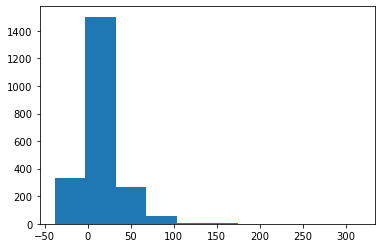

In [55]:
import numpy as np
x = 상승률.index
y = 상승률

plt.hist(상승률)

In [57]:
report_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1577 entries, 0 to 1576
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   종목명     1577 non-null   object
 1   리포트제목   1577 non-null   object
 2   적정가격    1577 non-null   object
 3   의견      1577 non-null   object
 4   증권사     1577 non-null   object
 5   날짜      1577 non-null   object
dtypes: object(6)
memory usage: 74.0+ KB


In [58]:
report_df

,종목명,리포트제목,적정가격,의견,증권사,날짜
0,SK하이닉스,리스크 관리가 좀더 필요한 시점,120000,매수(유지),하이투자증권,2021.10.15
1,솔루엠,수주잔고가 쌓인다,28000,매수(유지),하이투자증권,2021.10.15
2,유한양행,높아진 성공 가능성 할인보다 할증 요소,90000,매수(유지),키움증권,2021.10.15
3,코스모신소재,증설은 곧 성장이다,-,-,키움증권,2021.10.15
4,넷마블,"올해까지 실적으론 고평가, 내년 실적부턴 저평가",145000,매수,이베스트투자증권,2021.10.15
...,...,...,...,...,...,...
1572,우리금융지주,경상 수익성을 레벨업 시킨 top-line 개선,12500,매수,하나금융투자,2021.4.22
1573,엔씨소프트,"1Q21 Preview, 리니지M, 블소2",1200000,매수(유지),유안타증권,2021.4.22
1574,NAVER,"1Q21 Preview, 쿠팡, LINE, 제페토",550000,매수(유지),유안타증권,2021.4.22
1575,카카오,"1Q21 preview, 카카오 모빌리티, 두나무",135000,매수(유지),유안타증권,2021.4.22
